## First Row Education - Business Operations Training Project

In [1]:
#Loaded necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#Loaded data
academics = pd.read_csv('./Front Row Business Operations Training Project - Raw Training Data.csv')

#Returned first 5 ouptputs
academics.head()

,training_ID,date,name,training_type,hours,trainer_initials,school_id,t_reg_before,s_reg_before,active_t_before,active_s_before,math_ses_before,ela_ses_before,t_reg_after,s_reg_after,active_t_after,active_s_after,math_ses_after,ela_ses_after
0,68,9/1/17,Chastain Road Elementary,virtual,1.0,AP,79951,38,1448,0,0,0,0,38,1448,0,0,0,0
1,69,9/1/17,Edward W Wyatt Middle,virtual,1.0,MP,94459,13,454,0,0,0,0,13,454,0,0,0,0
2,70,9/1/17,Harper Creek Middle School,virtual,1.0,BB,45732,34,1440,0,0,0,0,34,1440,0,0,0,0
3,71,9/1/17,Children's Reading Center Charter,virtual,1.0,AP,23510,7,345,0,0,0,0,7,345,0,0,0,0
4,72,9/1/17,Skyline Elementary,virtual,1.0,BB,36503,13,394,0,0,0,0,13,394,0,0,0,0


In [3]:
#Converted date column to datetime format
academics.date = pd.to_datetime(academics.date)

#Created 2 new columns named month and quarter
academics['month'] = academics.date.dt.month
academics['quarter'] = academics.date.dt.quarter

In [4]:
#Sorted the data by date and updated the dataframe
academics = academics.sort_values(by='date')

In [5]:
#Checked to see if there were any missing, NaN, null values
academics.isnull().sum()

training_ID         0
date                0
name                1
training_type       2
hours               2
trainer_initials    1
school_id           0
t_reg_before        0
s_reg_before        0
active_t_before     0
active_s_before     0
math_ses_before     0
ela_ses_before      0
t_reg_after         0
s_reg_after         0
active_t_after      0
active_s_after      0
math_ses_after      0
ela_ses_after       0
month               0
quarter             0
dtype: int64

In [6]:
#Dropped uncessary data and checked size of new dataframe
academics = academics.dropna()
academics.shape

(248, 21)

In [7]:
#Looked into type of training customers used
academics.training_type.value_counts()

virtual    240
person       8
Name: training_type, dtype: int64

In [8]:
#Converted categorical data to numerical for plotting
academics.training_type = academics.training_type.apply(lambda x: 0 if x == 'person' else 1)

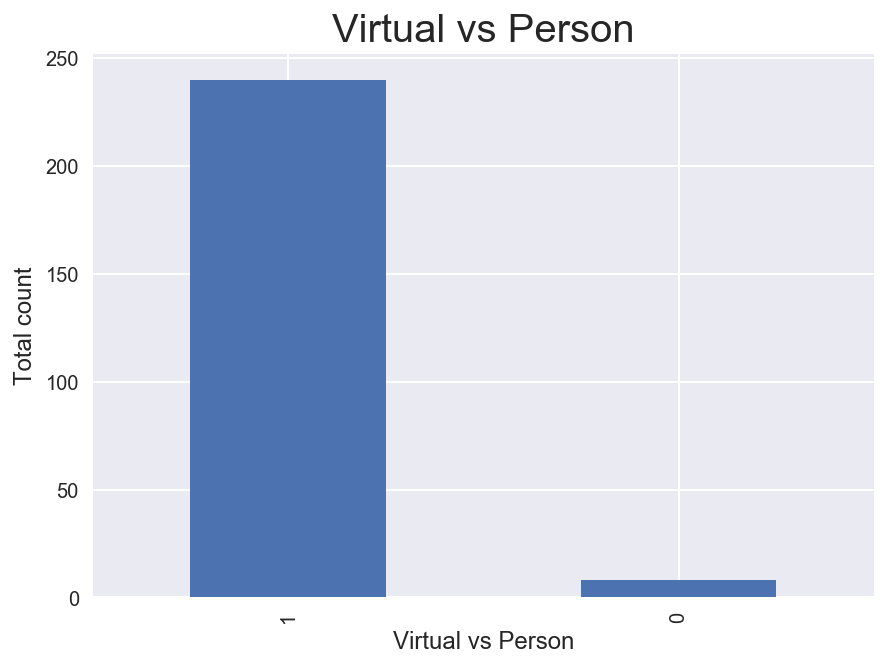

In [9]:
#Plotted virtual vs person training; 1 = virtual, 0 = person
fig = plt.figure(figsize=(7,5))
ax = fig.gca()

academics.training_type.value_counts().plot(kind='bar')

ax.set_xlabel('Virtual vs Person', fontsize = 12)
ax.set_ylabel('Total count', fontsize = 12)
ax.set_title('Virtual vs Person', fontsize = 20)

plt.show()

In [10]:
#Outputs how many unique schools there are
academics.name.value_counts().shape[0]

205

In [11]:
#Looked into how many hours were used for 
academics.hours.value_counts()

1.00    220
0.50     10
3.00      9
2.00      7
0.67      1
1.50      1
Name: hours, dtype: int64

In [12]:
#Returned the amount of data per quarter 
academics.quarter.value_counts()

4    100
1     89
3     59
Name: quarter, dtype: int64

In [13]:
#created sub dataframes for each quarter
quarter1_performace = academics[academics['quarter']==1]
quarter2_performace = academics[academics['quarter']==2]
quarter3_performace = academics[academics['quarter']==3]
quarter4_performace = academics[academics['quarter']==4]

In [14]:
#Created a function to calculate rate of change per category 
def performace_rate(value):
    active_t_rate = ((value.active_t_after-value.active_t_before)/value.active_t_before) * 100
    print "Average Active rate per Teacher:", active_t_rate.mean()
    
    t_reg_rate = ((value.t_reg_after-value.t_reg_before)/value.t_reg_before) * 100
    print "Average Registration rate per Teacher:", t_reg_rate.mean()
    
    active_s_rate = ((value.active_s_after-value.active_s_before)/value.active_s_before) * 100
    print "Average Active rate per Student:", active_s_rate.mean()
    
    s_reg_rate = ((value.s_reg_after-value.s_reg_before)/value.s_reg_before) * 100
    print "Average Registration rate per Student:", s_reg_rate.mean()

In [15]:
#Ran rate of change function to entire dataframe
print "Overall Data Performance Results:"
performace_rate(academics)

Overall Data Performance Results:
Average Active rate per Teacher: 31.9857217542
Average Registration rate per Teacher: 5.11246652679
Average Active rate per Student: 55.1357314694
Average Registration rate per Student: 5.09984295005


In [16]:
#Ran rate of change function per quarter
print "Quarter 1 Performace Results:"
performace_rate(quarter1_performace)
print "============"
print "Quarter 3 Performance Results:"
performace_rate(quarter3_performace)
print "============"
print "Quarter 4 Performance Results:"
performace_rate(quarter4_performace)

Quarter 1 Performace Results:
Average Active rate per Teacher: 31.9857217542
Average Registration rate per Teacher: 14.4021922889
Average Active rate per Student: 55.1357314694
Average Registration rate per Student: 14.3637132563
Quarter 3 Performance Results:
Average Active rate per Teacher: nan
Average Registration rate per Teacher: 0.0
Average Active rate per Student: nan
Average Registration rate per Student: 0.0
Quarter 4 Performance Results:
Average Active rate per Teacher: nan
Average Registration rate per Teacher: 0.0
Average Active rate per Student: nan
Average Registration rate per Student: 0.00262894999737


In [17]:
#Created function to calculate retention rate
def retention_rate(value):
    active_t_rate = (value.active_t_after/value.active_t_before)* 100
    print "Average Active rate per Teacher:", active_t_rate.mean()
    
    t_reg_rate = (value.t_reg_after/value.t_reg_before) * 100
    print "Average Registration rate per Teacher:", t_reg_rate.mean()
    
    active_s_rate = (value.active_s_after/value.active_s_before) * 100
    print "Average Active rate per Student:", active_s_rate.mean()
    
    s_reg_rate = (value.s_reg_after/value.s_reg_before) * 100
    print "Average Registration rate per Student:", s_reg_rate.mean()

In [18]:
#Ran retention function to entire dataframe
print "Overall Data Retention Results:"
retention_rate(academics)

Overall Data Retention Results:
Average Active rate per Teacher: 131.985721754
Average Registration rate per Teacher: 105.112466527
Average Active rate per Student: 155.135731469
Average Registration rate per Student: 105.09984295


In [19]:
#Ran retention function per quarter
print "Quarter 1 Retention Results:"
retention_rate(quarter1_performace)
print "============"
print "Quarter 3 Retention Results:"
retention_rate(quarter3_performace)
print "============"
print "Quarter 4 Retention Results:"
retention_rate(quarter4_performace)

Quarter 1 Retention Results:
Average Active rate per Teacher: 131.985721754
Average Registration rate per Teacher: 114.402192289
Average Active rate per Student: 155.135731469
Average Registration rate per Student: 114.363713256
Quarter 3 Retention Results:
Average Active rate per Teacher: nan
Average Registration rate per Teacher: 100.0
Average Active rate per Student: nan
Average Registration rate per Student: 100.0
Quarter 4 Retention Results:
Average Active rate per Teacher: nan
Average Registration rate per Teacher: 100.0
Average Active rate per Student: nan
Average Registration rate per Student: 100.00262895


In [20]:
#Looked into quarter 3 results; took first 5 rows 
print quarter3_performace.t_reg_before.value_counts().head()

13    6
15    5
7     5
12    4
14    4
Name: t_reg_before, dtype: int64


In [21]:
#Looked into quarter 3 results; took first 5 rows
print quarter3_performace.t_reg_after.value_counts().head()

13    6
15    5
7     5
12    4
14    4
Name: t_reg_after, dtype: int64


----------------

## Analysis / Summary

**First Glance**

What I first noticed in the dataset was the date. It was not sorted correctly. It started from September 2017 and ended at February 2017. After sorting the data, it was also missing several months (March - August to be exact). I was hoping to do a quarterly analysis, but all of Quarter 2 was missing. The date data was unbalanced. In addition, there were a few rows with missing data (null values). After updating the dataset, I was able to perform some statistics and analysis.

**Statistics**

There are 205 distinct schools. About 97% chose virtual trainings over the other 3% who preferred personal trainings. 200 confirmed for 1 hour sessions wehre as only 9 confirmed for 3 hours or more.

**Analysis**

We looked at the performace rate for all registered and active teachers and students. As we can see, all results were positive! This is great! The average active rate for teachers came out to: 32% and the average registered teacher came out to: 5%. For the students, 55% became active where an additional 5% increase were registered. 

**Summary**

This proves that the trainings do have a major impact on schools! It does provide insight on how much usage per user. However, for Front Row Education, it would be more beneficial if schools purchased the additional training package. 

## Updates / Future Findings

Overall, I enjoyed analyzing this dataset. One of the major issues was the incomplete data. It's difficult to produce a timeline analysis for customer usage or profit gain without all the data. Also, it would be great to see the scores for homework, tests, etc. from the students to see how much of an impact First Row Education provides. 

I always look at the data. The data is where I spend most of my time. Creating analyses would provide nothing if the data is incorrect. It's vital to any bussiness, company, or service.